# Llama-2-7b Tokenizer

# Introduction

This Colab notebook is designed to guide you through the process of exploring the tokenizer used by the Llama 2 7B model. The focus will be on understanding the tokenizer's structure and behavior, particularly through its SentencePiece model file.

## Contents

1. **Loading the Tokenizer**: Instructions on how to load the Llama 2 7B tokenizer within the Colab environment.

2. **Chat Template Exploration**: We will examine the chat template utilized by the tokenizer, understanding its role and how it influences tokenization.

3. **Prompt Examination**: This section will delve into how prompts are processed by the tokenizer, highlighting the significance of prompt structure and content.

4. **SentencePiece Model File**: An in-depth look at the SentencePiece model file that underpins the tokenizer. We will explore how to access and interpret the information contained within this file, including vocabulary and subword segmentation rules.

Each section will provide clear and direct instructions, along with code snippets and explanations to facilitate your understanding of the Llama 2 7B tokenizer's inner workings.

[Sentencepiece Python documention](https://github.com/google/sentencepiece/blob/master/python/README.md)

[Google Sentencepiece Colab](https://github.com/google/sentencepiece/blob/master/python/sentencepiece_python_module_example.ipynb)

In [2]:
# Required when training models/data that are gated on HuggingFace, like Llama 2.
!pip install huggingface_hub
from huggingface_hub import notebook_login

notebook_login()

In [1]:
!pip install -q -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 17.9 MB/s eta 0:00:00


In [3]:
from transformers import AutoTokenizer

checkpoint = "meta-llama/Llama-2-7b-chat-hf"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

loading file tokenizer.model from cache at /root/.cache/huggingface/hub/models--meta-llama--Llama-2-7b-chat-hf/snapshots/92011f62d7604e261f748ec0cfe6329f31193e33/tokenizer.model
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--meta-llama--Llama-2-7b-chat-hf/snapshots/92011f62d7604e261f748ec0cfe6329f31193e33/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--meta-llama--Llama-2-7b-chat-hf/snapshots/92011f62d7604e261f748ec0cfe6329f31193e33/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--meta-llama--Llama-2-7b-chat-hf/snapshots/92011f62d7604e261f748ec0cfe6329f31193e33/tokenizer_config.json


In [4]:
tokenizer

LlamaTokenizerFast(name_or_path='meta-llama/Llama-2-7b-chat-hf', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [6]:
print("BOS Token:", tokenizer.bos_token)
print("EOS Token:", tokenizer.eos_token)
print("UNK Token:", tokenizer.unk_token)

BOS Token: <s>
EOS Token: </s>
UNK Token: <unk>


In [7]:
print("PAD Token:", tokenizer.pad_token)

PAD Token: None


# Chat template

In [8]:
print("chat_template:", tokenizer.chat_template)

chat_template: {% if messages[0]['role'] == 'system' %}{% set loop_messages = messages[1:] %}{% set system_message = messages[0]['content'] %}{% else %}{% set loop_messages = messages %}{% set system_message = false %}{% endif %}{% for message in loop_messages %}{% if (message['role'] == 'user') != (loop.index0 % 2 == 0) %}{{ raise_exception('Conversation roles must alternate user/assistant/user/assistant/...') }}{% endif %}{% if loop.index0 == 0 and system_message != false %}{% set content = '<<SYS>>\n' + system_message + '\n<</SYS>>\n\n' + message['content'] %}{% else %}{% set content = message['content'] %}{% endif %}{% if message['role'] == 'user' %}{{ bos_token + '[INST] ' + content.strip() + ' [/INST]' }}{% elif message['role'] == 'assistant' %}{{ ' '  + content.strip() + ' ' + eos_token }}{% endif %}{% endfor %}


In [16]:
messages = [
    {
        "role": "system",
        "content": "You are a friendly chatbot who always responds in the style of a pirate",
    },
    {"role": "user", "content": "How many helicopters can a human eat in one sitting?"},
 ]
tokenized_chat = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True, return_tensors="pt")

print(tokenized_chat)

<s>[INST] <<SYS>>
You are a friendly chatbot who always responds in the style of a pirate
<</SYS>>

How many helicopters can a human eat in one sitting? [/INST]


In [10]:
messages = [
    {
        "role": "system",
        "content": "You are a friendly chatbot who always responds in the style of a pirate",
    },
    {"role": "user", "content": "How many helicopters can a human eat in one sitting?"},
 ]
tokenized_chat = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt")

print(tokenized_chat)


tensor([[    1,   518, 25580, 29962,  3532, 14816, 29903,  6778,    13,  3492,
           526,   263, 19780, 13563,  7451,  1058,  2337, 10049, 29879,   297,
           278,  3114,   310,   263, 21625,   403,    13, 29966,   829, 14816,
         29903,  6778,    13,    13,  5328,  1784,  1081,   293,   459,  2153,
           508,   263,  5199, 17545,   297,   697, 16246, 29973,   518, 29914,
         25580, 29962]])


In [12]:
print(tokenizer.decode(tokenized_chat[0]))

<s> [INST] <<SYS>>
You are a friendly chatbot who always responds in the style of a pirate
<</SYS>>

How many helicopters can a human eat in one sitting? [/INST]


In [18]:
messages = [
    {"role": "system", "content": "You are a friendly chatbot who always responds in the style of a pirate",},
    {"role": "user", "content": "How many helicopters can a human eat in one sitting?"},
    {"role": "assistant", "content": "I would guess fifty"},
    {"role": "user", "content": "How many helicopters can a human eat in two sitting?"},
 ]
tokenized_chat = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt")

print(tokenizer.decode(tokenized_chat[0]))

<s> [INST] <<SYS>>
You are a friendly chatbot who always responds in the style of a pirate
<</SYS>>

How many helicopters can a human eat in one sitting? [/INST] I would guess fifty </s><s> [INST] How many helicopters can a human eat in two sitting? [/INST]


In [19]:
messages = [
    {"role": "system", "content": "You are a friendly chatbot who always responds in the style of a pirate",},
    {"role": "user", "content": "How many helicopters can a human eat in one sitting?"},
    {"role": "assistant", "content": "I would guess fifty"},
    {"role": "user", "content": "How many helicopters can a human eat in two sitting?"},
 ]
tokenized_chat = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=False, return_tensors="pt")

print(tokenizer.decode(tokenized_chat[0]))

<s> [INST] <<SYS>>
You are a friendly chatbot who always responds in the style of a pirate
<</SYS>>

How many helicopters can a human eat in one sitting? [/INST] I would guess fifty </s><s> [INST] How many helicopters can a human eat in two sitting? [/INST]


In [20]:
messages = [
    {"role": "user", "content": "Hi there!"},
    {"role": "assistant", "content": "Nice to meet you!"},
    {"role": "user", "content": "Can I ask a question?"}
]

tokenized_chat = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=False, return_tensors="pt")

print(tokenizer.decode(tokenized_chat[0]))

<s> [INST] Hi there! [/INST] Nice to meet you! </s><s> [INST] Can I ask a question? [/INST]


# Vocab

In [21]:
# Get the tokenizer's vocabulary
vocab = tokenizer.get_vocab()

# Print a part of the vocabulary
# This prints the first 10 items sorted by token ID
for token, token_id in sorted(vocab.items(), key=lambda item: item[1])[:10]:
    print(f'{token}: {token_id}')

<unk>: 0
<s>: 1
</s>: 2
<0x00>: 3
<0x01>: 4
<0x02>: 5
<0x03>: 6
<0x04>: 7
<0x05>: 8
<0x06>: 9


In [24]:
print(len(vocab))

32000


# Examine the .model file with protobuf

In [5]:
tokenizer.save_pretrained("old_tokenizer")

tokenizer config file saved in old_tokenizer/tokenizer_config.json
Special tokens file saved in old_tokenizer/special_tokens_map.json


('old_tokenizer/tokenizer_config.json',
 'old_tokenizer/special_tokens_map.json',
 'old_tokenizer/tokenizer.model',
 'old_tokenizer/added_tokens.json',
 'old_tokenizer/tokenizer.json')

In [12]:
from transformers.convert_slow_tokenizer import import_protobuf

model_pb2 = import_protobuf()

m = model_pb2.ModelProto()

m.ParseFromString(open('./old_tokenizer/tokenizer.model', 'rb').read())
len(m.pieces)

32000

In [13]:
list(tokenizer.vocab.items())[:20]

[('▁півден', 27513),
 ('ट', 31329),
 ('<0x84>', 135),
 ('œuv', 13753),
 ('▁Ga', 10415),
 ('▁tang', 18806),
 ('▁brought', 6296),
 ('ams', 2232),
 ('urls', 26045),
 ('▁perl', 21185),
 ('course', 15775),
 ('▁Little', 11143),
 ('izon', 18162),
 ('▁entity', 7855),
 ("'),", 5477),
 ('SU', 14605),
 ('router', 15140),
 ('▁związ', 27859),
 ('olph', 22138),
 ('▁Zero', 28933)]

In [14]:
kept_pieces = []

for p in m.pieces:

    if p.piece.lstrip("_").isascii():
        kept_pieces.append(p)


In [15]:
len(kept_pieces)

11301

In [16]:
tokenizer("hello world!").input_ids

[1, 22172, 3186, 29991]

In [17]:
tokenizer("hello world!")


{'input_ids': [1, 22172, 3186, 29991], 'attention_mask': [1, 1, 1, 1]}

In [18]:
tokenizer("[INST]")

{'input_ids': [1, 518, 25580, 29962], 'attention_mask': [1, 1, 1, 1]}

In [23]:
# Iterate through the pieces to print out the first few
for i in range(min(10, len(m.pieces))):
    piece = m.pieces[i]
    print(f"Piece {i}: {piece.piece}, Score: {piece.score}")


Piece 0: <unk>, Score: 0.0
Piece 1: <s>, Score: 0.0
Piece 2: </s>, Score: 0.0
Piece 3: <0x00>, Score: 0.0
Piece 4: <0x01>, Score: 0.0
Piece 5: <0x02>, Score: 0.0
Piece 6: <0x03>, Score: 0.0
Piece 7: <0x04>, Score: 0.0
Piece 8: <0x05>, Score: 0.0
Piece 9: <0x06>, Score: 0.0


In [24]:
search_terms = ['▁the', '▁and', 'ing', '▁']  # Include common prefixes, suffixes, or other subwords of interest

for term in search_terms:
    found = [piece for piece in m.pieces if term in piece.piece]
    print(f"Found {len(found)} pieces containing '{term}':", [f.piece for f in found[:5]], "...")


Found 21 pieces containing '▁the': ['▁the', '▁there', '▁then', '▁they', '▁them'] ...
Found 6 pieces containing '▁and': ['▁and', '▁android', '▁andere', '▁anderen', '▁anderem'] ...
Found 593 pieces containing 'ing': ['ing', '▁using', 'ings', 'tring', 'ning'] ...
Found 16409 pieces containing '▁': ['▁▁', '▁t', '▁a', '▁th', '▁▁▁▁'] ...


Average subword length: 5.06315625


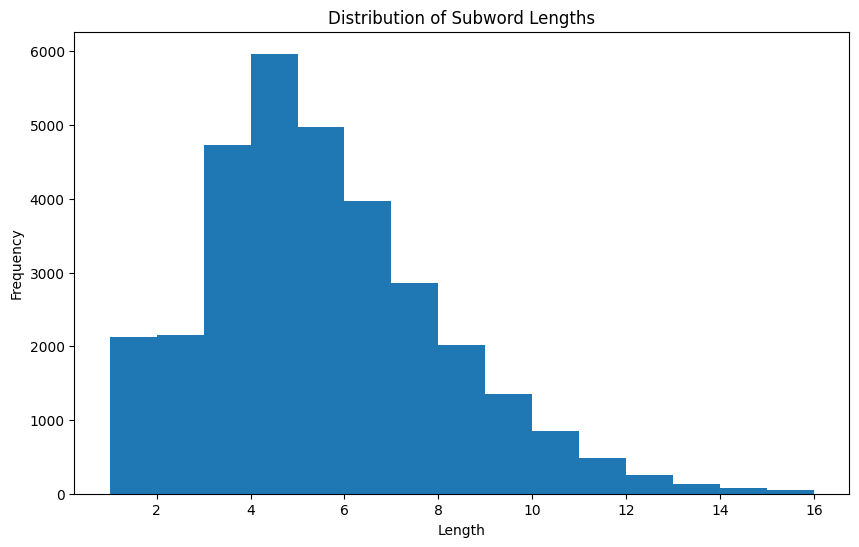

In [25]:
import matplotlib.pyplot as plt

lengths = [len(piece.piece) for piece in m.pieces]
avg_length = sum(lengths) / len(lengths)
print(f"Average subword length: {avg_length}")

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=range(1, max(lengths)+1))
plt.title('Distribution of Subword Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Examine the .model file with Sentencepiece

In [27]:
!pip install -q sentencepiece


In [28]:
import sentencepiece as spm

# Load the SentencePiece model
sp = spm.SentencePieceProcessor()
sp.load('./old_tokenizer/tokenizer.model')

# Print the size of the vocabulary
vocab_size = sp.get_piece_size()
print(f"Vocabulary size: {vocab_size}")

# List some vocabulary pieces
for i in range(10):
    print(sp.id_to_piece(i), sp.get_score(i))  # Prints the token and its score (log probability)


Vocabulary size: 32000
<unk> 0.0
<s> 0.0
</s> 0.0
<0x00> 0.0
<0x01> 0.0
<0x02> 0.0
<0x03> 0.0
<0x04> 0.0
<0x05> 0.0
<0x06> 0.0


In [29]:
# Encode a text into token IDs
encoded_ids = sp.encode_as_ids("This is a test sentence.")
print("Encoded token IDs:", encoded_ids)

# Decode token IDs back to text
decoded_text = sp.decode_ids(encoded_ids)
print("Decoded text:", decoded_text)

# Encode a text into tokens/pieces
encoded_pieces = sp.encode_as_pieces("This is a test sentence.")
print("Encoded pieces:", encoded_pieces)


Encoded token IDs: [910, 338, 263, 1243, 10541, 29889]
Decoded text: This is a test sentence.
Encoded pieces: ['▁This', '▁is', '▁a', '▁test', '▁sentence', '.']
